In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('CarPrice.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data=data.drop(['car_ID'], axis =1)


In [5]:
data['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [6]:
data['Company'] = data['CarName'].apply(lambda x:x.split(' ')[0]) 
data['Company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: Company, dtype: object

In [7]:
data = data.drop(['CarName'], axis =1)

In [8]:
data['Company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Company, dtype: int64

In [9]:
data['Company'].replace('toyouta', 'toyota',inplace=True)
data['Company'].replace('Nissan', 'nissan',inplace=True)
data['Company'].replace('maxda', 'mazda',inplace=True)
data['Company'].replace('vokswagen', 'volkswagen',inplace=True)
data['Company'].replace('vw', 'volkswagen',inplace=True)
data['Company'].replace('porcshce', 'porsche',inplace=True)

data['Company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64

In [10]:
objcols = data.select_dtypes(include='object')
objcols

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [11]:
numbers = { 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven':11, 'twelve': 12 }

data = data.replace(numbers)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


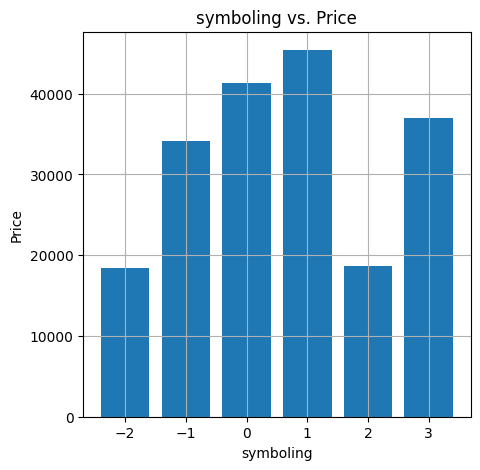

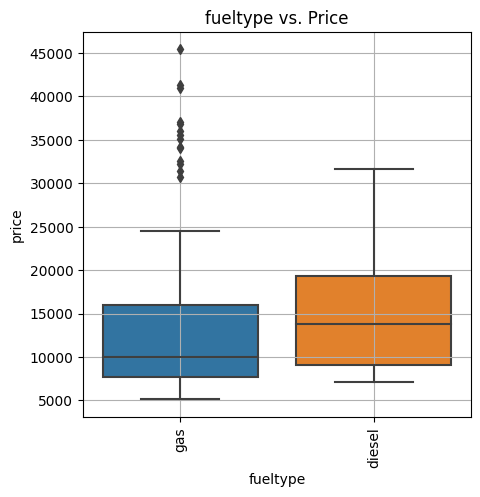

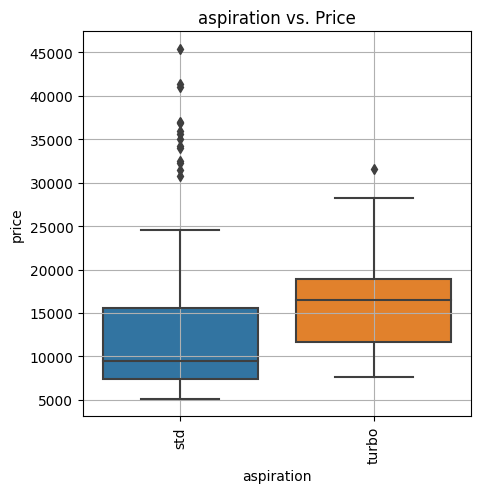

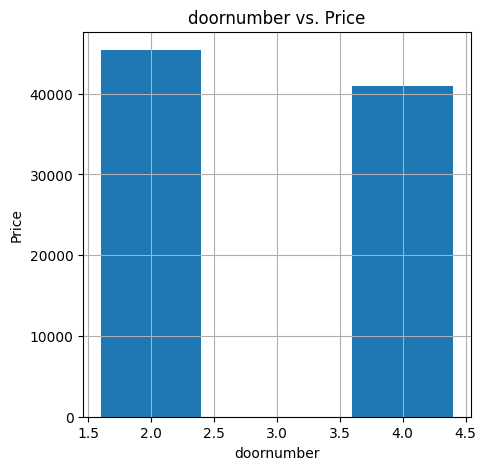

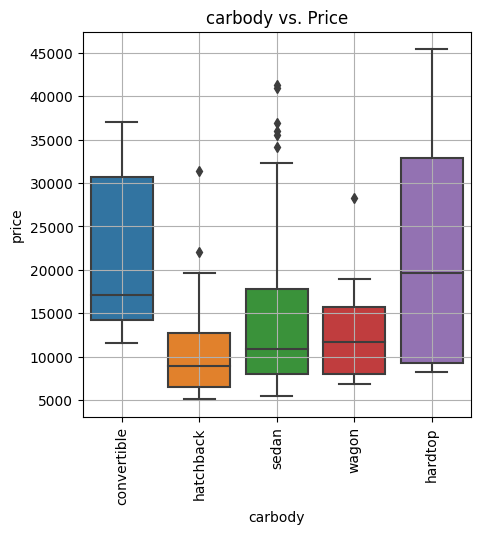

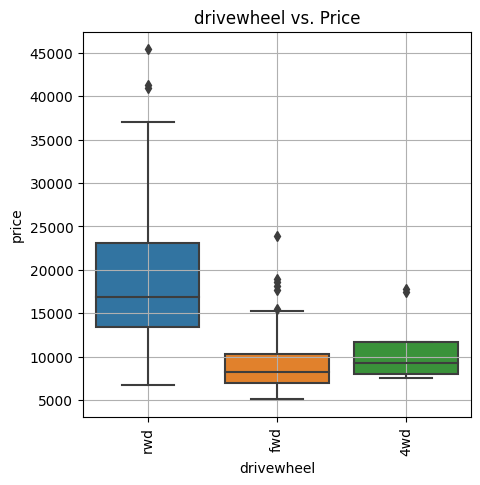

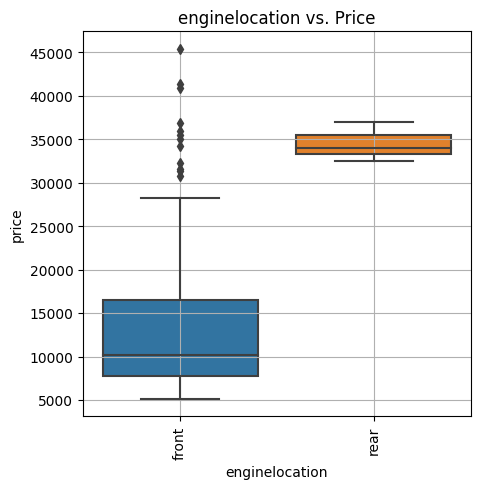

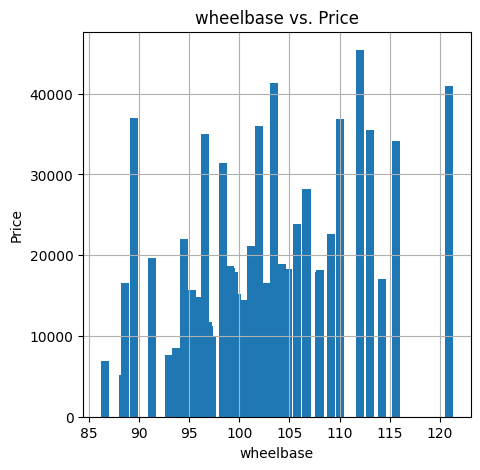

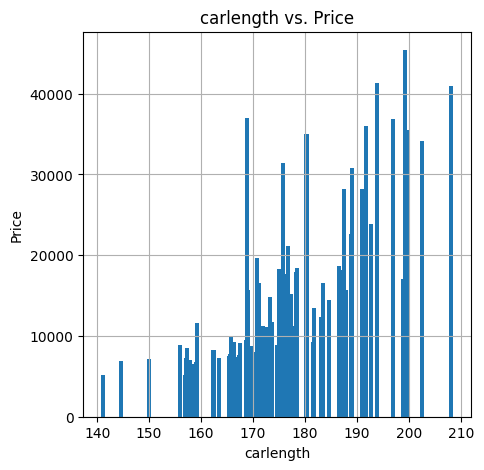

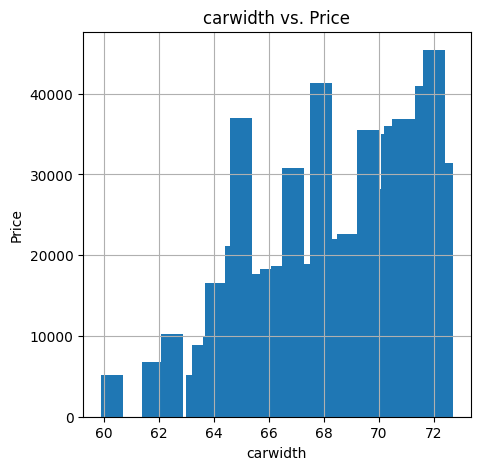

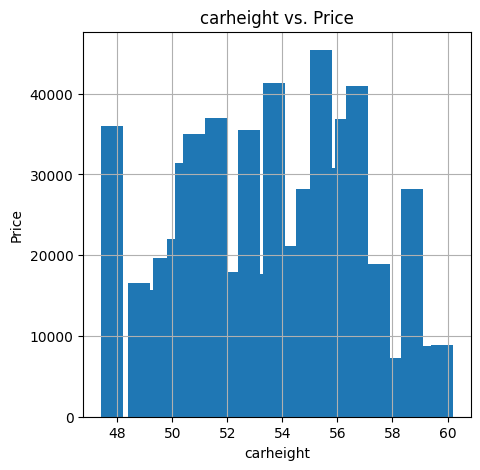

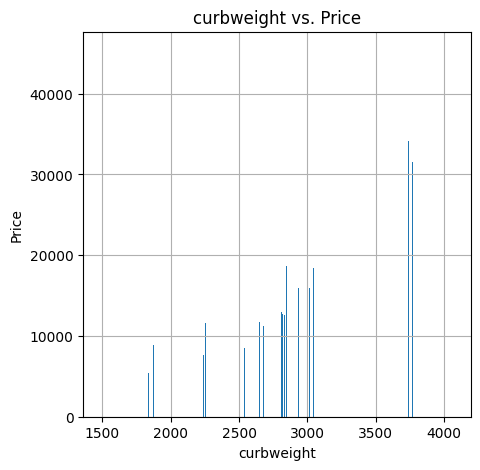

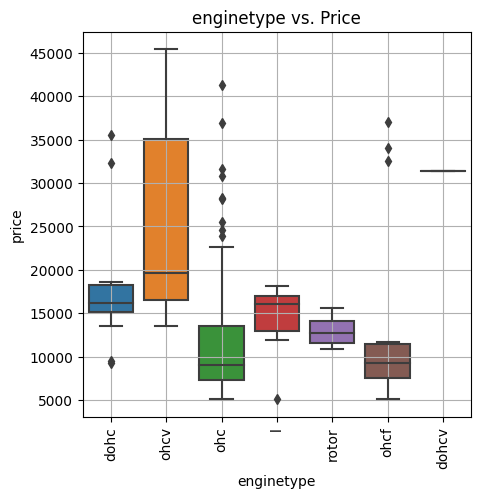

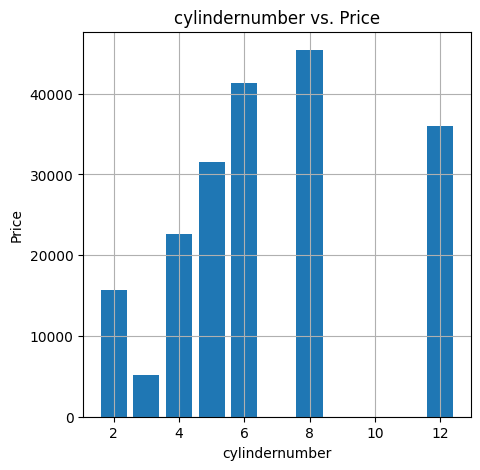

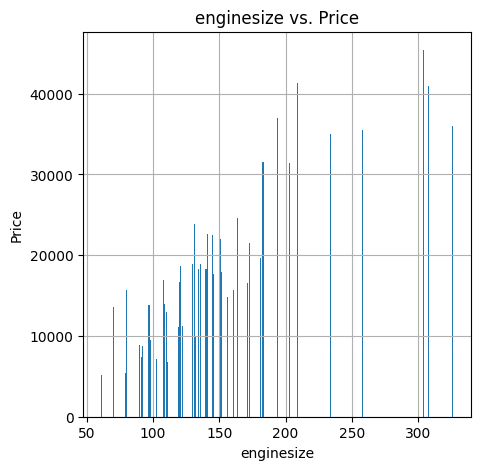

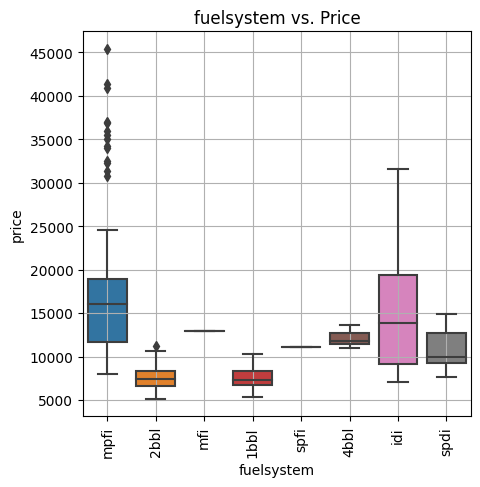

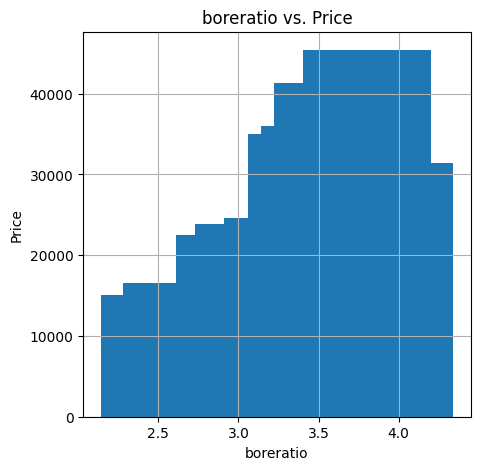

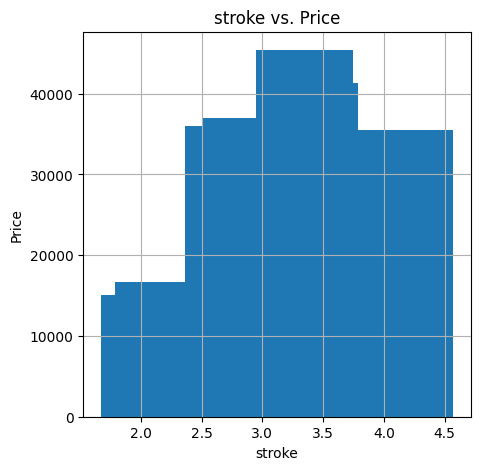

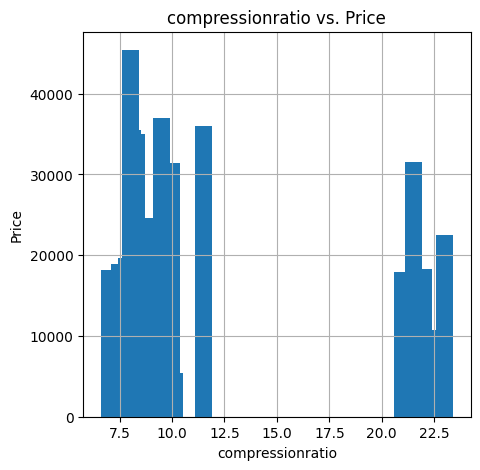

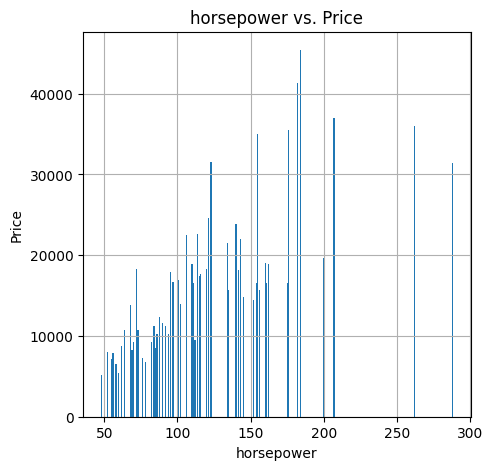

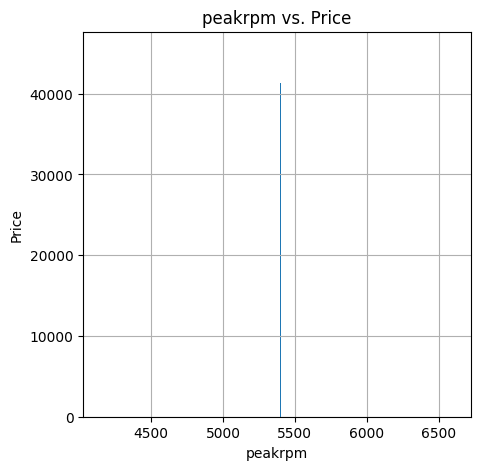

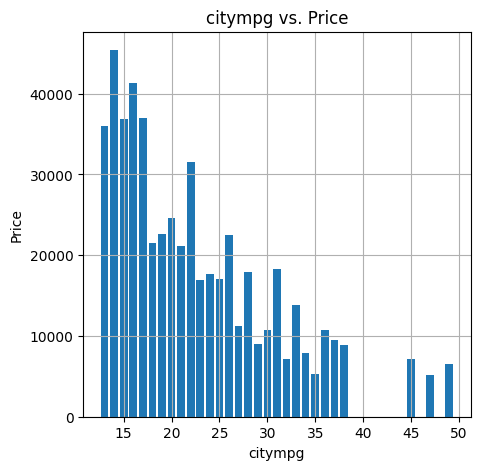

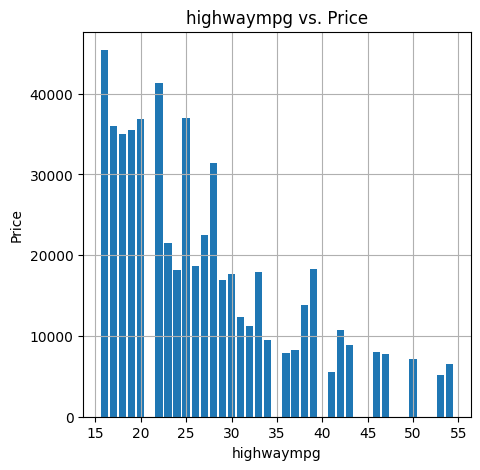

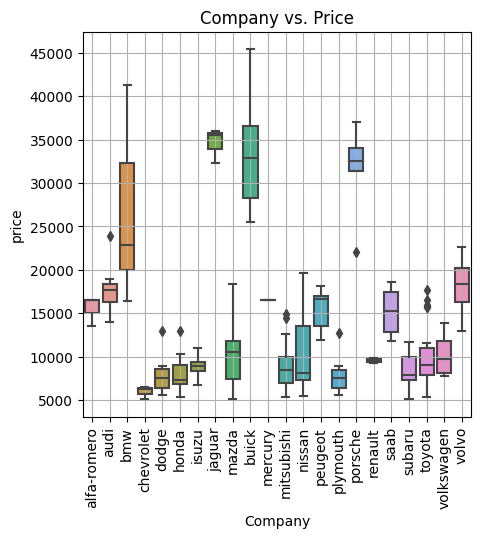

In [12]:

independent_variables = data.drop(['price'], axis=1).columns

for column in independent_variables:
    plt.figure(figsize=(5, 5))

    if data[column].dtype == 'object':
        sn.boxplot(x=column, y='price', data=data)
        plt.xticks(rotation=90)
        plt.title(f'{column} vs. Price')

    else:
        plt.bar(data[column], data['price'], data=data )
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'{column} vs. Price')
    
    plt.grid(True)
    plt.show()

In [13]:
data=data.drop(['doornumber','carheight','carwidth','enginetype','fuelsystem'], axis =1)


In [14]:
objcols = data.select_dtypes(include='object')
objcols

,fueltype,aspiration,carbody,drivewheel,enginelocation,Company
0,gas,std,convertible,rwd,front,alfa-romero
1,gas,std,convertible,rwd,front,alfa-romero
2,gas,std,hatchback,rwd,front,alfa-romero
3,gas,std,sedan,fwd,front,audi
4,gas,std,sedan,4wd,front,audi
...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,volvo
201,gas,turbo,sedan,rwd,front,volvo
202,gas,std,sedan,rwd,front,volvo
203,diesel,turbo,sedan,rwd,front,volvo


In [15]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [16]:
data = data.replace({
        'fueltype': {'gas': 0, 'diesel': 1},
        'aspiration': {'std': 0, 'turbo': 1},
        'carbody': {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4},
        'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
        'enginelocation': {'front': 0, 'rear': 1},
        'symboling': {-3: 0, -2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6}
    })



In [17]:
compnames = {}
ls = data['Company'].unique()
for i in range(22):
    compnames[ls[i]] = i
data = data.replace(compnames)


In [18]:
objcols = data.select_dtypes(include='object')
objcols

""
0
1
2
3
4
...
200
201
202
203


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('price', axis=1)  
y = data['price']            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.model_selection import cross_val_score

estimators = [100, 200, 300, 400, 500]

cv_scorelist = []

# Performing k-fold cross-validation for each number of estimators

for n in estimators:
    
    random_forest = RandomForestRegressor(n_estimators=n, random_state=42)
    
    # Perform 5-fold cross-validation and get the R2 scores for each fold
    scores = cross_val_score(random_forest, X, y, cv=5, scoring='r2')
    
    # Calculate the mean R2 score across all folds
    mean_r2_scores = np.mean(scores)
    
    cv_scorelist.append(mean_r2_scores)

best_index = np.argmax(cv_scorelist)

best_n_estimators = estimators[best_index]

In [21]:
random_forest = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2*100)

R-squared (R2): 95.63353487672907


In [22]:
comparison_df = pd.DataFrame({'Real Price': y_test, 'Expected Price': y_pred})
print(comparison_df)

     Real Price  Expected Price
15    30760.000    36275.960000
9     17859.167    19321.035000
100    9549.000     9011.010000
132   11850.000    12777.494167
68    28248.000    27113.203750
95     7799.000     6489.210000
159    7788.000     7672.832500
162    9258.000     7993.147500
147   10198.000     9647.107500
182    7775.000     8195.035000
191   13295.000    13785.256458
164    8238.000     7981.965000
65    18280.000    14085.451667
175    9988.000    10909.198333
73    40960.000    40883.863214
152    6488.000     6341.055000
18     5151.000     5835.738750
82    12629.000    14067.377500
86     8189.000     8553.700833
143    9960.000     9102.803333
60     8495.000    10356.250000
101   13499.000    15215.620000
98     8249.000     7338.132500
30     6479.000     5769.331250
25     6692.000     7369.337500
16    41315.000    36263.508750
168    9639.000     9268.810000
195   13415.000    17019.202500
97     7999.000     7320.900000
194   12940.000    16640.387500
67    25

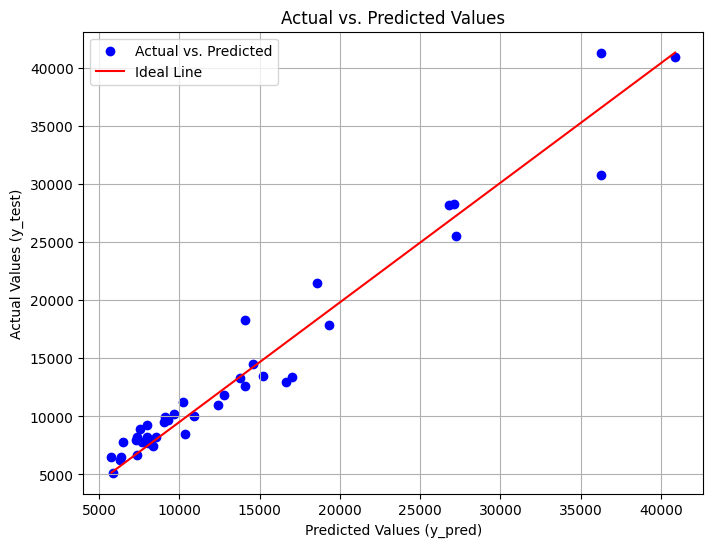

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
user = {
    'symboling': 4,'fueltype': 'gas','aspiration':'std','carbody':'sedan','drivewheel':'fwd','enginelocation':'front','wheelbase':105.8,'carlength':192.7,
    'curbweight':2844,'cylindernumber': 'five','enginesize': 136,'boreratio': 3.19,'stroke':3.4,'compressionratio':8.5,'horsepower' : 110,
    'peakrpm': 5500,'citympg':19,'highwaympg':25,'Company': 'audi'
}

    
userdata = pd.DataFrame([user])

userdata = userdata.replace({
        'fueltype': {'gas': 0, 'diesel': 1},
        'aspiration': {'std': 0, 'turbo': 1},
        'carbody': {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4},
        'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
        'enginelocation': {'front': 0, 'rear': 1},
        'symboling': {-3: 0, -2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6}
    })


userdata = userdata.replace(compnames)
userdata = userdata.replace(numbers)

predicted_price = random_forest.predict(userdata)

print("Predicted Price:", predicted_price[0])

Predicted Price: 18283.4025
